# Linear Regression 

## import library

In [63]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [64]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0] 
xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

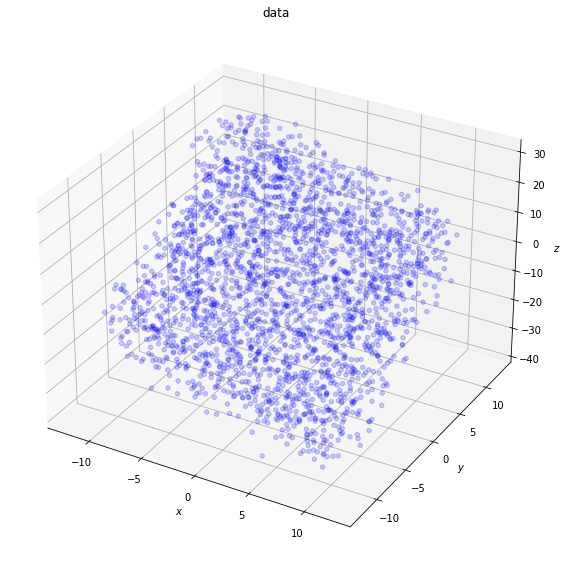

In [65]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [66]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    f = theta[0] + (theta[1] * x) + (theta[2] * y)
    num_data = x.shape[0]
    residual = f - z
    # ============================

    return residual, num_data

In [67]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual, num_data = compute_residual(theta, x, y, z)
    loss = np.sum(np.power(residual, 2)) / (2 * num_data)
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [68]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    f = theta[0] + (theta[1] * x) + (theta[2] * y)
    residual, num_data = compute_residual(theta, x, y, z)
    
    oneVector = np.ones(2500)
    gradList = np.vstack((oneVector, x, y))
    gradList = np.transpose(gradList)

    grad = (np.dot(residual, gradList)) / num_data
    
    # ============================

    return grad

## gradient descent for each model parameter

In [69]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))

theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    theta  = theta - learning_rate * compute_gradient(theta, xx, yy, zz)
    loss    = compute_loss(theta, xx, yy, zz)

    theta_iteration[i] = theta
    loss_iteration[i] = loss
    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))



iteration =    0, loss = 46.08423
iteration =    1, loss = 25.70661
iteration =    2, loss = 17.25197
iteration =    3, loss = 13.71586
iteration =    4, loss = 12.20934
iteration =    5, loss = 11.54086
iteration =    6, loss = 11.21896
iteration =    7, loss = 11.04093
iteration =    8, loss = 10.92313
iteration =    9, loss = 10.83106
iteration =   10, loss = 10.75047
iteration =   11, loss = 10.67546
iteration =   12, loss = 10.60359
iteration =   13, loss = 10.53382
iteration =   14, loss = 10.46572
iteration =   15, loss = 10.39908
iteration =   16, loss = 10.33383
iteration =   17, loss = 10.26989
iteration =   18, loss = 10.20723
iteration =   19, loss = 10.14582
iteration =   20, loss = 10.08563
iteration =   21, loss = 10.02664
iteration =   22, loss = 9.96883
iteration =   23, loss = 9.91217
iteration =   24, loss = 9.85663
iteration =   25, loss = 9.80220
iteration =   26, loss = 9.74885
iteration =   27, loss = 9.69657
iteration =   28, loss = 9.64532
iteration =   29, los

In [70]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [71]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    
    plt.plot(range(0, len(loss_iteration)),loss_iteration,'-', color='blue')

    # ============================
    plt.tight_layout()
    plt.show()

In [72]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    # ============================    
    plt.tight_layout()
    plt.show()

In [73]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====

    plt.plot(range(0, len(theta_iteration)), theta_iteration[:, 0], '-', color='red')
    plt.plot(range(0, len(theta_iteration)), theta_iteration[:, 1], '-', color='green')
    plt.plot(range(0, len(theta_iteration)), theta_iteration[:, 2], '-', color='blue')
    # ============================
    plt.tight_layout()
    plt.show()

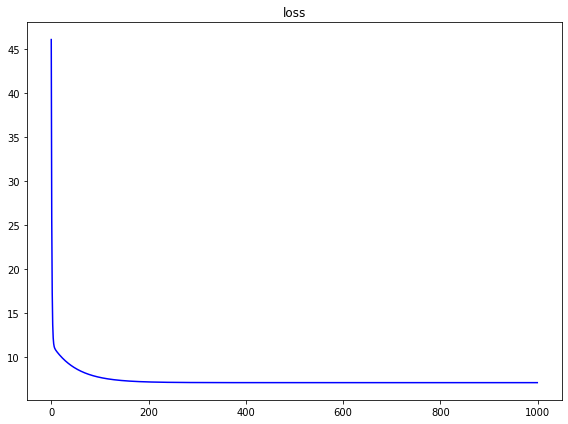

In [74]:
plot_loss_curve(loss_iteration)

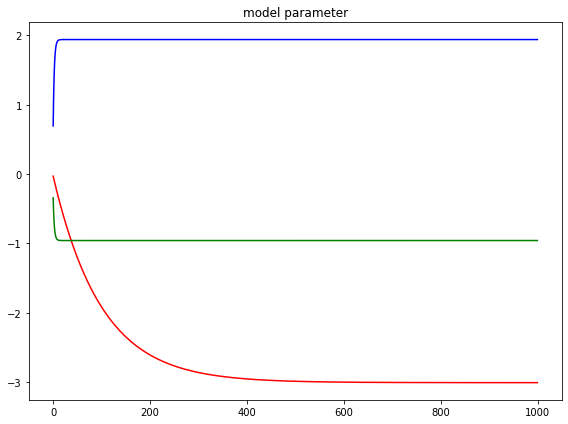

In [75]:
plot_model_parameter(theta_iteration)

In [76]:
# ===== FILL UP THE CODE =====
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros((2500,2500))
for i in range(0,XX.shape[0]):
    for j in range(0,XX.shape[0]):
        ZZ[i][j] = (theta[0] + (theta[1] * XX[i][j]) + (theta[2] * YY[i][j]))

# ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

    ax.plot_surface(XX, YY, ZZ, cmap='viridis')

    # ============================
    plt.tight_layout()
    plt.show()

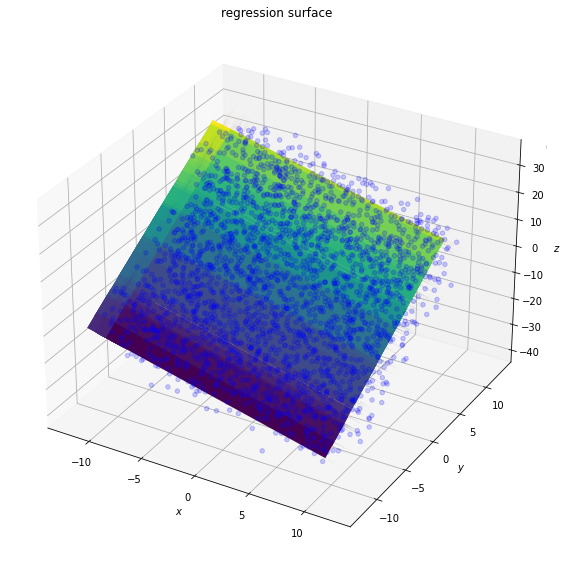

In [77]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

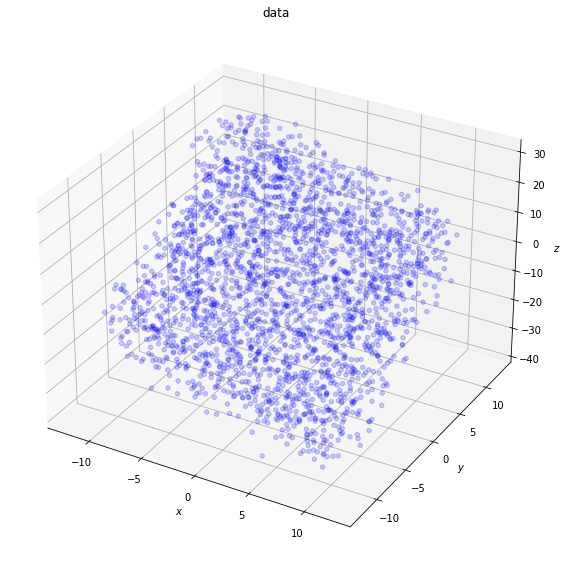

In [78]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

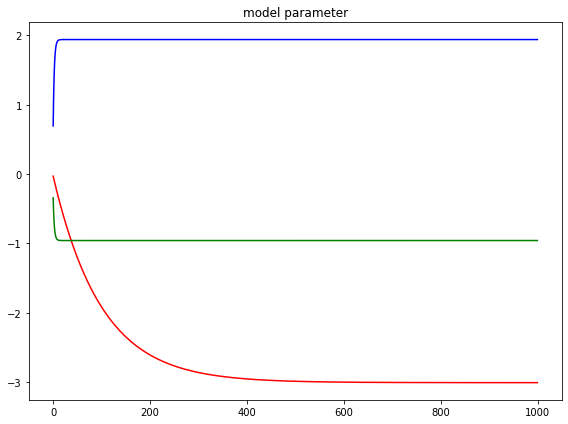

In [79]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

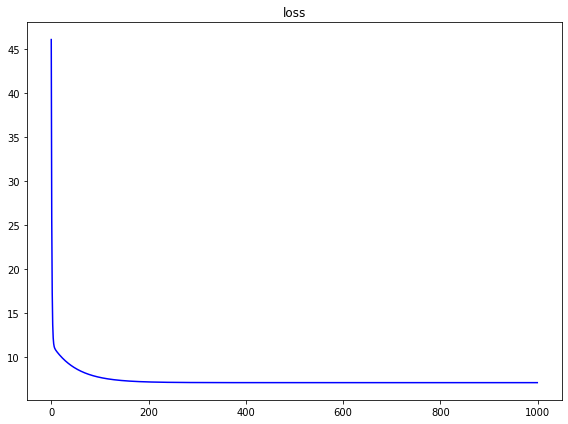

In [80]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

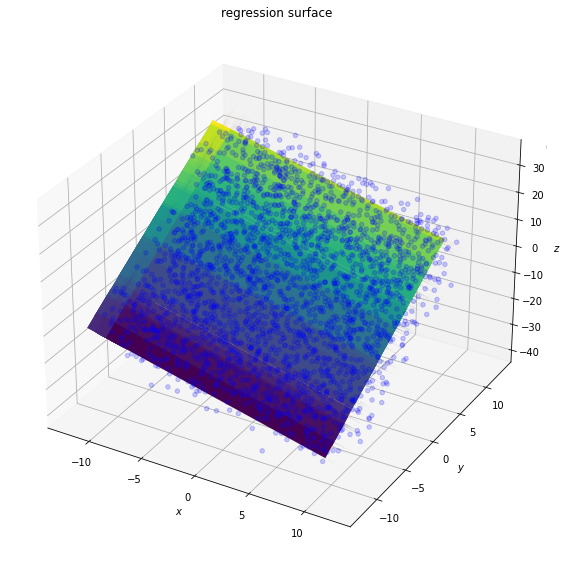

In [81]:
plot_surface(XX, YY, ZZ, xx, yy, zz)